<a href="https://colab.research.google.com/github/khanhc/BTVN_AI_W11_21_04_23/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [11]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [12]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/Flower/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 130 images belonging to 5 classes.


In [13]:
training_set.class_indices

{'Boconganh': 0, 'Cuc': 1, 'Hong': 2, 'Huongduong': 3, 'Tulip': 4}

In [14]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [15]:
train=model.fit(training_set,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
5/5 [==============================] - 44s 10s/step - loss: 2.6314 - accuracy: 0.2000
Epoch 2/20
5/5 [==============================] - 9s 2s/step - loss: 1.5612 - accuracy: 0.2769
Epoch 3/20
5/5 [==============================] - 10s 2s/step - loss: 1.5120 - accuracy: 0.4000
Epoch 4/20
5/5 [==============================] - 10s 2s/step - loss: 1.3875 - accuracy: 0.4154
Epoch 5/20
5/5 [==============================] - 9s 2s/step - loss: 1.3374 - accuracy: 0.3538
Epoch 6/20
5/5 [==============================] - 11s 2s/step - loss: 1.2871 - accuracy: 0.4077
Epoch 7/20
5/5 [==============================] - 10s 2s/step - loss: 1.1313 - accuracy: 0.5462
Epoch 8/20
5/5 [==============================] - 11s 2s/step - loss: 1.1418 - accuracy: 0.5538
Epoch 9/20
5/5 [==============================] - 11s 3s/step - loss: 1.0020 - accuracy: 0.5846
Epoch 10/20
5/5 [==============================] - 9s 2s/step - loss: 0.9968 - accuracy: 0.6615
Epoch 11/20
5/5 [========================

In [16]:
#Lưu
from keras.models import load_model
model.save("Nhan_Biet_Hoa_CNN.h5")
model_1=load_model('Nhan_Biet_Hoa_CNN.h5')

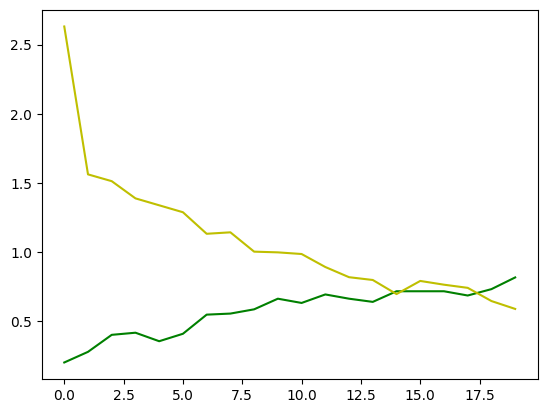

In [17]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 286ms/step
huongduong


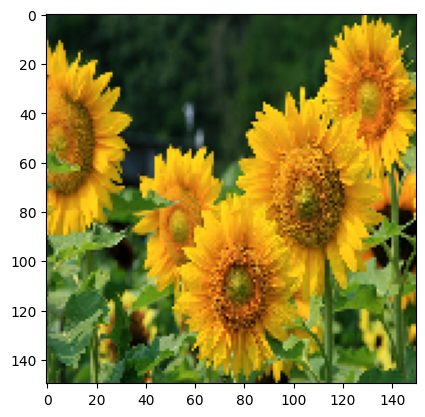

1/1 [==============================] - 0s 68ms/step
tulib


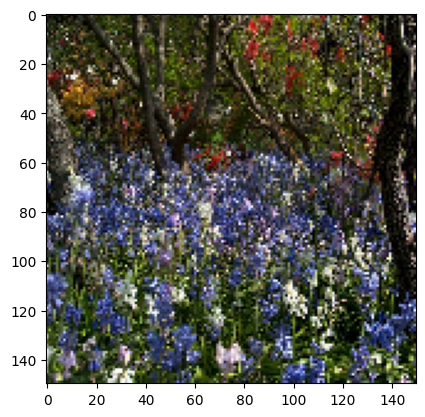

1/1 [==============================] - 0s 69ms/step
Hong


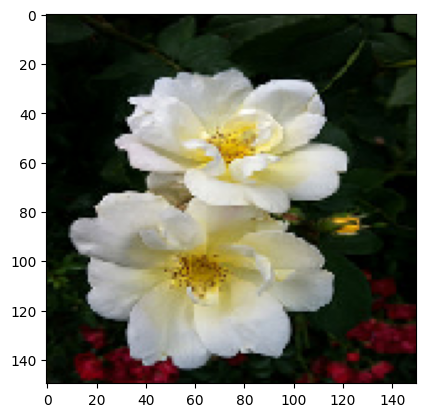

1/1 [==============================] - 0s 45ms/step
Hong


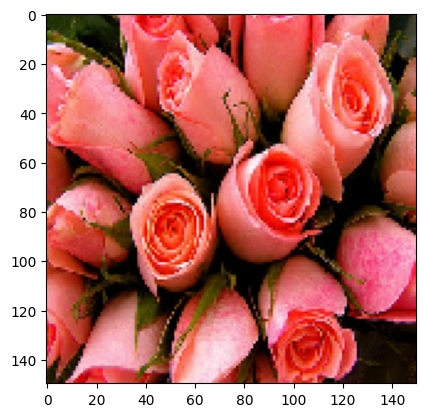

1/1 [==============================] - 0s 44ms/step
Cuc


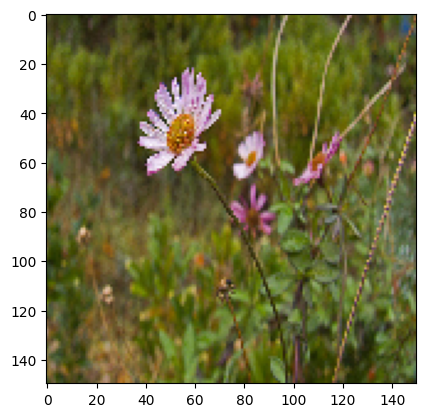

1/1 [==============================] - 0s 44ms/step
Hong


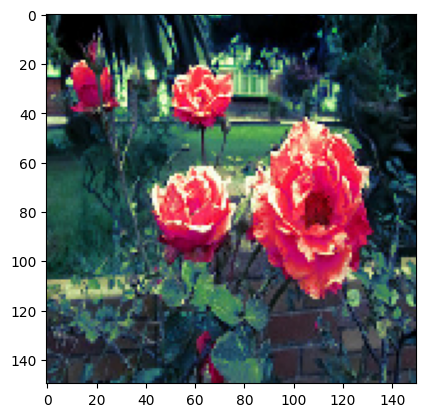

1/1 [==============================] - 0s 43ms/step
Cuc


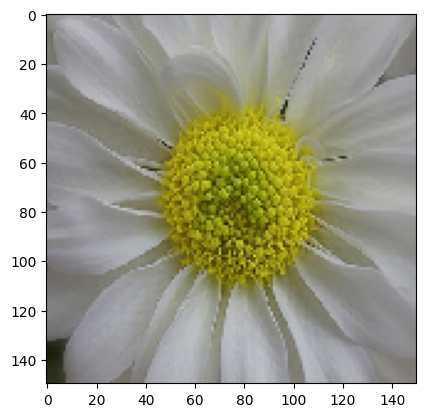

1/1 [==============================] - 0s 42ms/step
Hong


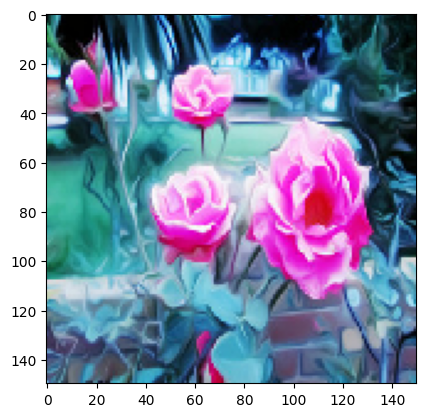

1/1 [==============================] - 0s 41ms/step
Cuc


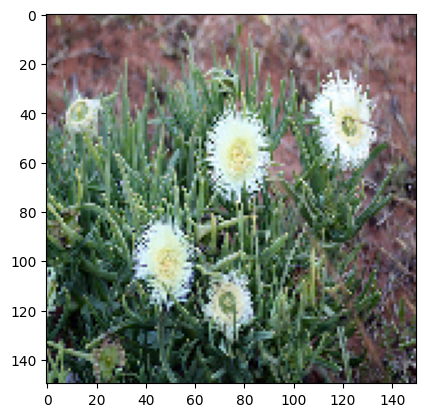

1/1 [==============================] - 0s 47ms/step
Cuc


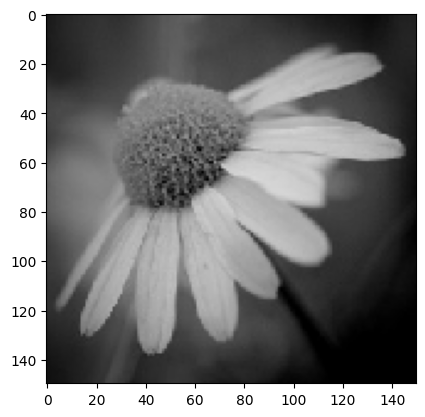

1/1 [==============================] - 0s 43ms/step
Cuc


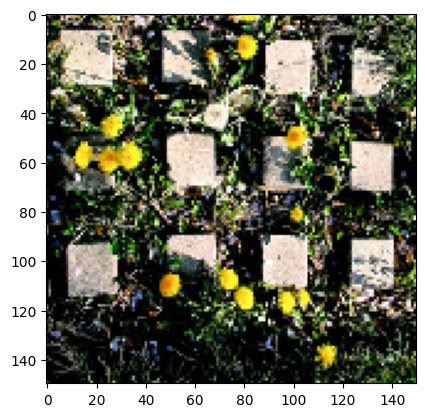

1/1 [==============================] - 0s 41ms/step
huongduong


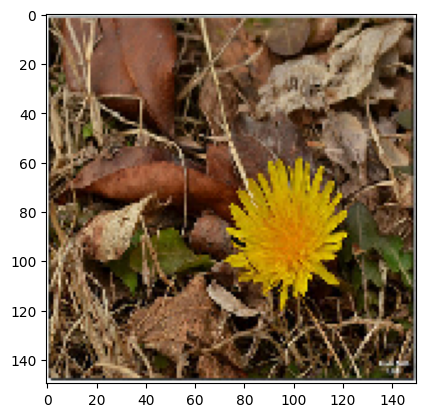

1/1 [==============================] - 0s 41ms/step
Cuc


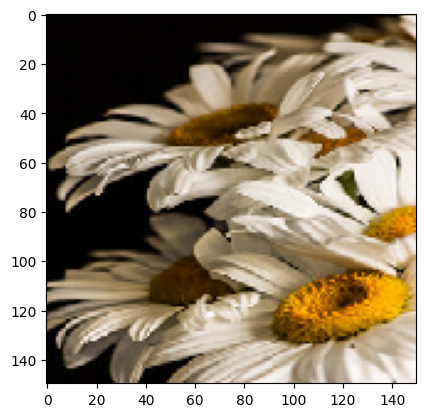

1/1 [==============================] - 0s 40ms/step
huongduong


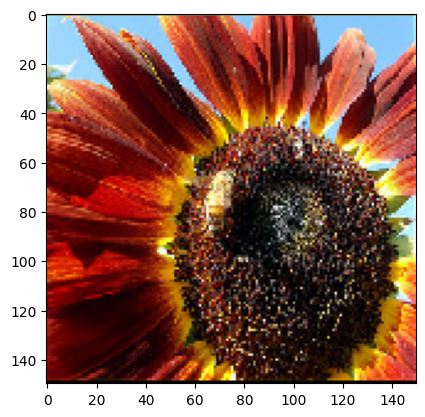

1/1 [==============================] - 0s 42ms/step
Boconganh


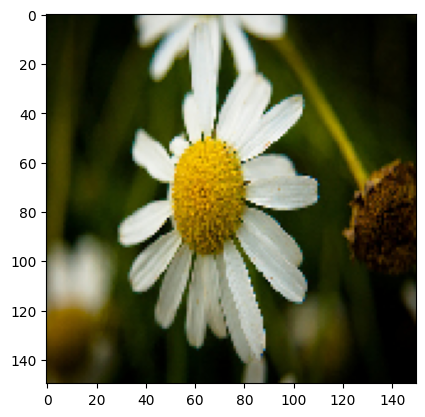

1/1 [==============================] - 0s 41ms/step
tulib


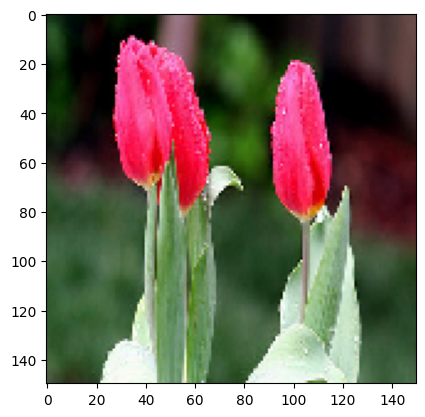

In [18]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt
test='/content/drive/MyDrive/AI/Flower/Test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Boconganh','Cuc','Hong','huongduong','tulib']
  print(class_name[result]) 
  plt.show()